In [1]:
import pandas as pd
import numpy as np

C:\Users\MM COMPUTER\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\MM COMPUTER\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\MM COMPUTER\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('Reduced_ctgan_result_oversampling_final_Ten_Col.csv')

In [3]:
#features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 
#'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
#85%, #features = ['anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'serum_creatinine', 'time']
#features = [ 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'age']
features = ['test1','test2','test3','test4','test5','test6','test7','test8','test9','test10']
#features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 
#            'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
X = df[features]
Y = df.DEATH_EVENT

In [4]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   test1   406 non-null    float64
 1   test2   406 non-null    float64
 2   test3   406 non-null    float64
 3   test4   406 non-null    float64
 4   test5   406 non-null    float64
 5   test6   406 non-null    float64
 6   test7   406 non-null    float64
 7   test8   406 non-null    float64
 8   test9   406 non-null    float64
 9   test10  406 non-null    float64
dtypes: float64(10)
memory usage: 31.8 KB


In [5]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, Y, random_state = 0)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#Number of rows in the training dataset
print("Num of rows in the training dataset",len(train_X))
#Number of rows in the test dataset
print("Num of rows in the test dataset",len(val_X))

Num of rows in the training dataset 304
Num of rows in the test dataset 102


In [6]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=75, random_state=0)
brf.fit(train_X, train_y)
pred_y = brf.predict(val_X)
accuracy = accuracy_score(val_y, pred_y.round())
print(accuracy)
print(classification_report(val_y, pred_y.round()))

0.9215686274509803
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.95      0.92      0.93        59

    accuracy                           0.92       102
   macro avg       0.92      0.92      0.92       102
weighted avg       0.92      0.92      0.92       102



In [7]:
# Instantiate random forest and train on new features
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(max_depth=22, n_estimators = 1000, random_state = 100)
rfModel.fit(train_X, train_y)
pred_y = rfModel.predict(val_X)
accuracy = accuracy_score(val_y, pred_y.round())
print(accuracy)
print(classification_report(val_y, pred_y.round()))

0.9215686274509803
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.95      0.92      0.93        59

    accuracy                           0.92       102
   macro avg       0.92      0.92      0.92       102
weighted avg       0.92      0.92      0.92       102



In [8]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier  
#rfModel = RandomForestClassifier( n_estimators = 100, random_state = 40)
rfModel = RandomForestClassifier( n_estimators = 75, random_state = 0)
rfModel.fit(train_X, train_y)
pred_y = rfModel.predict(val_X)
accuracy = accuracy_score(val_y, pred_y)
accuracy

0.9313725490196079

In [9]:
from sklearn.metrics import classification_report
print(classification_report(val_y, pred_y))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        43
           1       0.96      0.92      0.94        59

    accuracy                           0.93       102
   macro avg       0.93      0.93      0.93       102
weighted avg       0.93      0.93      0.93       102



In [10]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(val_y, pred_y))

Accuracy:  0.9313725490196079


In [11]:
print("Mean Absolute Error: ", mean_absolute_error(val_y, pred_y)) #max_features=3 for higher accuracy

Mean Absolute Error:  0.06862745098039216


In [12]:
from sklearn.metrics import f1_score

score = f1_score(pred_y, val_y)
print("F1 Score: ",score)

F1 Score:  0.9391304347826087


In [13]:
from sklearn.metrics import confusion_matrix
conmat = confusion_matrix(val_y, pred_y)
val = np.mat(conmat) 

classnames = list(set(train_y))
df_cm = pd.DataFrame(
        val, index=classnames, columns=classnames, 
    )
print("Confusion Matrix:\n", df_cm)

Confusion Matrix:
     0   1
0  41   2
1   5  54


In [14]:
TP = conmat[1, 1]
TN = conmat[0, 0]
FP = conmat[0, 1]
FN = conmat[1, 0]

print("True Positive:",TP) 
print("True Negative:",TN)
print("False Positive:",FP) 
print("False Negative:",FN) 

True Positive: 54
True Negative: 41
False Positive: 2
False Negative: 5


In [15]:
# Metrics computed from a confusion matrix
#Classification Accuracy: Overall, how often is the classifier correct?
from sklearn.metrics import accuracy_score
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(val_y, pred_y))

0.9313725490196079
0.9313725490196079


In [16]:
#Classification Error: Overall, how often is the classifier incorrect?
from sklearn import metrics
#Also known as "Misclassification Rate"
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(val_y, pred_y))

0.06862745098039216
0.06862745098039214


In [17]:
#Sensitivity: When the actual value is positive, how often is the prediction correct?
#Something we want to maximize
#How "sensitive" is the classifier to detecting positive instances?
#Also known as "True Positive Rate" or "Recall"
#TP / all positive
#all positive = TP + FN
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(val_y, pred_y))

0.9152542372881356
0.9152542372881356


In [18]:
#Specificity: When the actual value is negative, how often is the prediction correct?

#Something we want to maximize
#How "specific" (or "selective") is the classifier in predicting positive instances?
#TN / all negative
#all negative = TN + FP

specificity = TN / (TN + FP)

print(specificity)

0.9534883720930233


In [19]:
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.046511627906976744
0.046511627906976716


In [20]:
#Precision: When a positive value is predicted, how often is the prediction correct?

#How "precise" is the classifier when predicting positive instances?
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(val_y, pred_y))

0.9642857142857143
0.9642857142857143


In [21]:
# Precision Recall AUC Score
#The Area Under the Curve (AUC) is the measure of the ability of a classifier 
#to distinguish between classes and is used as a summary of the ROC curve. 
#The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes
# The value is needed for a imbalanced dataset or imbalanced classes in binary
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# predict probabilities
y_test_proba = rfModel.predict_proba(val_X)
# keep probabilities for the positive outcome only
y_test_proba = y_test_proba[:, 1]

rf_precision, rf_recall, _ = precision_recall_curve(val_y, y_test_proba)
rf_f1, rf_auc = f1_score(val_y, pred_y), auc(rf_recall, rf_precision)
print(rf_f1, rf_auc)

0.9391304347826087 0.9855657274611181


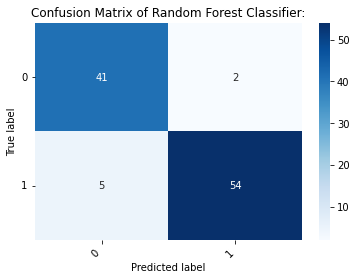

In [22]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Confusion Matrix of Random Forest Classifier:')

plt.show()  

C:\Users\MM COMPUTER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


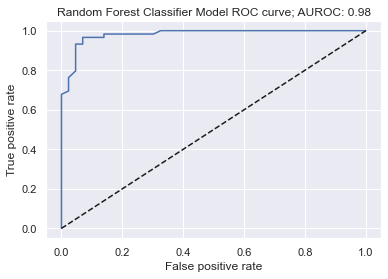

In [23]:
#ROC Curve and AUROC
#The AUROC is a way to measure how robust your model is across decision thresholds. 
#It is the area under the plot of the true positive rate versus the false positive rate. 
#The true positive rate (TPR) is (true positives)/(true positives + false negatives). 
#The false positive rate is the (false positive)/(false positive + true negative). 

from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfModel.predict_proba(np.array(val_X))[:,1]

fpr, tpr, thresholds = roc_curve(val_y, y_pred_proba)

sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(val_y, y_pred_proba), 2)

plt.title(f'Random Forest Classifier Model ROC curve; AUROC: {AUROC}');

plt.show()

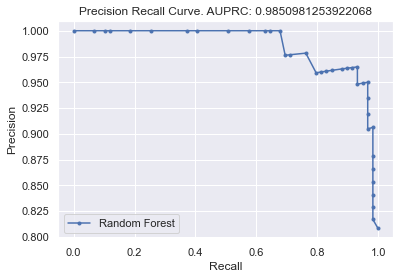

In [24]:
#AUPRC (Average Precision) 
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import average_precision_score

# predict probabilities
y_test_proba = rfModel.predict_proba(val_X)
# keep probabilities for the positive outcome only
y_test_proba = y_test_proba[:, 1]

average_precision = average_precision_score(val_y, y_test_proba)

precision, recall, thresholds = precision_recall_curve(val_y, y_test_proba)

plt.plot(recall, precision, marker='.', label='Random Forest')

plt.xlabel('Recall')

plt.ylabel('Precision')

plt.legend()

plt.title(f'Precision Recall Curve. AUPRC: {average_precision}')

plt.show()

In [25]:
val_X

,test1,test2,test3,test4,test5,test6,test7,test8,test9,test10
175,-0.472887,1.009159,-0.758803,-2.278993,0.925334,-0.025950,-0.579410,0.597684,0.560546,-0.140218
239,-0.667707,1.395020,-0.198014,-1.966001,-0.143060,-0.340332,-0.642543,-0.150725,0.467857,0.380984
60,-1.561277,1.443846,-1.069030,6.332199,0.938644,3.970570,-2.293661,1.412172,-0.813873,2.669194
231,-0.188297,2.104872,0.445987,-0.900080,-0.624134,-0.273670,1.019223,-0.380754,-0.078642,-0.405854
134,-0.277616,2.991500,-0.659003,1.767599,-0.416841,3.053098,-0.291933,1.398862,-0.882476,0.832709
...,...,...,...,...,...,...,...,...,...,...
356,3.908788,-0.575508,-0.417204,-0.905351,-1.929684,0.817252,-0.316798,0.225620,0.327084,0.348271
56,0.893772,1.048073,-1.118180,-1.242314,-0.747615,-0.340883,-0.883246,0.296168,0.522375,0.073232
8,0.727005,-1.515827,-0.189692,-0.275151,0.802623,1.576829,0.115491,0.375821,0.469071,-2.304945
194,0.075406,0.459722,-0.110214,1.466135,-1.372231,-0.035377,0.634384,-2.012426,0.482297,0.257330


In [26]:
# Decesion Tree
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=3)
model.fit(train_X, train_y)
val_predictions = model.predict(val_X)
# print(mean_absolute_error(val_y, val_predictions))
accuracy2 = accuracy_score(val_y, val_predictions.round(), normalize=False)
accuracy2 # 0.737

86

In [27]:
# Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
gbModel = GradientBoostingClassifier()
gbModel.fit(train_X, train_y)
gbPrediction = gbModel.predict(val_X)
# print(mean_absolute_error(val_y, lrPrediction))

accuracy3 = metrics.accuracy_score(val_y, gbPrediction)
accuracy3 # 0.738

0.9411764705882353

In [28]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lrModel = LinearRegression()
lrModel.fit(train_X, train_y)
lrPrediction = lrModel.predict(val_X)
lrPrediction = np.around(lrPrediction) # Regression array to classification array 
lrPrediction = lrPrediction.astype(int) # float to int
# print(mean_absolute_error(val_y, lrPrediction))

accuracy4 = metrics.accuracy_score(val_y, lrPrediction)
accuracy4 # 0.730

0.9019607843137255

In [68]:
import pandas as pd
import numpy as np

In [102]:
#df = pd.read_csv('Reduced_ctgan_result_oversampling_final_Six_Col.csv')

In [29]:
#features = ['test1','test2','test3','test4','test5','test6']
X = df[features]
Y = df.DEATH_EVENT

In [30]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, Y, test_size=0.25,random_state = 0)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#Number of rows in the training dataset
print("Num of rows in the training dataset",len(train_X))
#Number of rows in the test dataset
print("Num of rows in the test dataset",len(val_X))

Num of rows in the training dataset 304
Num of rows in the test dataset 102


In [31]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lrModel = LogisticRegression()
lrModel.fit(train_X, train_y)
lrPrediction = lrModel.predict(val_X)
lrPrediction = np.around(lrPrediction) # Regression array to classification array 
lrPrediction = lrPrediction.astype(int) # float to int
# print(mean_absolute_error(val_y, lrPrediction))

accuracy4 = metrics.accuracy_score(val_y, lrPrediction)
accuracy4 # 0.730

0.9117647058823529

(array([203.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 203.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

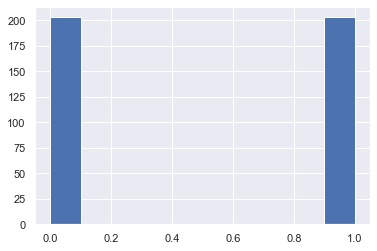

In [32]:
import matplotlib.pyplot as plt
plt.hist(Y)